# Linear Regression

The linear regression model is one of the most simple models used in predictive modeling. This notebook will demonstate:

1. Visually showo what a Linear Regression is
2. Show how to model a Simple Linear Regression and Mulit-Linear Regression in Sklearn
3. Create a Simple Linear Regression from scratch
4. Create a Multi Linear Regression from scratch

In [95]:
import sklearn
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

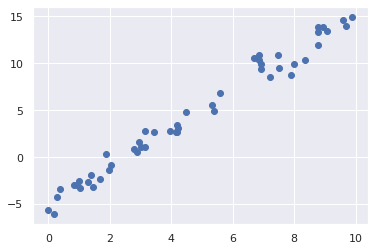

In [96]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x,y);

### This visually shows a Simple Linear Regression with Sklearn
##### Note: a Simple Linear Regression means there is only one independent variable and one dependent variable (one X and one Y)

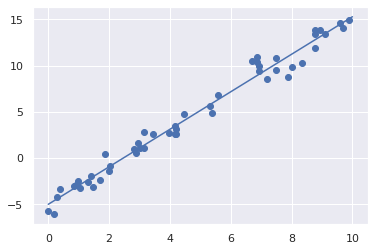

In [97]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(x.reshape(-1,1), y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit.reshape(-1,1))

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [4]:
print('Slope:  ', model.coef_[0])
print('Intercept:  ', model.intercept_)

Slope:   2.027208810360695
Intercept:   -4.998577085553202


In [5]:
x2 = 10 * rng.rand(100,2)
y2 = .5 + np.dot(x2, [1.5, -2])

In [6]:
model.fit(x2, y2)
print(model.coef_)
print(model.intercept_)


[ 1.5 -2. ]
0.4999999999999978


### Multi-linear Regression

##### Multi-linear Regressions are very difficult to visualize. We can visualize a Multi Regression if there are only two dependent variables and on indpendent variable.

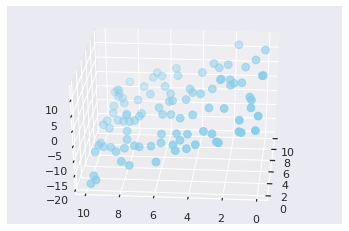

In [7]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x2[:,0], x2[:,1], y2, c='skyblue', s=60)
ax.view_init(30, 185)
plt.show()


#### Below is a dataframe where "g" is the indpendent variable. We cannot visualize the relationship a, b, c, and d have with g, but we can create a model that understands the relationship. You can tell by the models coeffcients or slope below.

In [11]:
import pandas as pd

df = pd.DataFrame([[1,2,3,4,5], [11,22,36,45,51], [3,4,6,9,12], [5,6,7,8,9]], columns=['a', 'b', 'c', 'd','g'])
df.head()

,a,b,c,d,g
0,1,2,3,4,5
1,11,22,36,45,51
2,3,4,6,9,12
3,5,6,7,8,9


In [23]:
model.fit(df[['a', 'b', 'c', 'd']].values, df.g.values)

print('Slope:  ', model.coef_)
print('Intercept:  ', model.intercept_)
model.predict([[1,2,3,4]])

Slope:   [ 0.51589595 -0.75578035 -0.64017341  1.8800578 ]
Intercept:   0.395953757225449


array([5.])

### These are the formulas I used to create a SimpleLinearRegression and MultiLinearRegression

![formula](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/39_blog_image_1.png)

In [136]:
class SimpleLinearRegression:
    def __init__(self):
        pass
    def fit(self, X, y):
        self.centriod_x = sum(X) / len(X)
        self.centriod_y = sum(y) / len(y)
        self.dev_sum = sum((np.array(X) - self.centriod_x) * (np.array(y) - self.centriod_y))
        self.dev_squared = sum(np.square(np.array(X) - self.centriod_x))
        self.b_one = self.dev_sum / self.dev_squared
        self.b_zero = self.centriod_y - (self.b_one * self.centriod_x)
    def pred(self, X):
        return(self.b_zero + (self.b_one * np.array(X)))

In [137]:
model = SimpleLinearRegression()

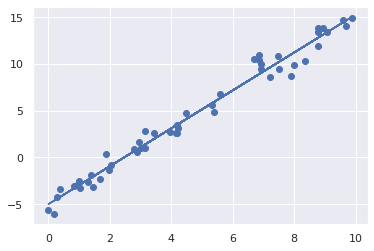

In [139]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

model.fit(x,y)
yfit = model.pred(x)

plt.scatter(x, y)
plt.plot(x, yfit);